## LOAN PERFORMANCE FOR A FINANCIAL COMPANY

### RESEARCH QUESTION

Build a predicitve model to determine if a loan taken by a customer would be Performing or Non-performing

## Metrics of Success
*The accuracy score and f1 score will be used to measure and evaluate the predictive power the of models*

## Importing libraries

In [1]:
# Importing libraries
# Pandas library will load data into a dataframe containing columns and rows
# Matplotlib and seaborn will be used to make visualisations and graphs
# The sklearn library is used to create a model that will do the prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

## Loading the data to a pandas dataframe

In [2]:
##loading the cleaned datasets

df_account = pd.read_csv('df_account.csv',skiprows = 0)
df_balances = pd.read_csv('df_balances.csv',skiprows = 0)
df_demo = pd.read_csv('df_demo.csv',skiprows = 0)
df_invest = pd.read_csv('df_invest.csv',skiprows = 0)
df_loan = pd.read_csv('df_loan.csv',skiprows = 0)
df_loanapp = pd.read_csv('df_loanapp (1).csv')

In [3]:
df_account.head()

,customer_unique_id,acy_avl_bal
0,56000,136043.480
1,62005,1541733.575
2,104008,12364.060
3,175007,20029.550
4,200006,61489.560


In [4]:
df_balances.head()

,customer_unique_id,val_dt,bal
0,278604001,10/1/2019,20017.89
1,936686000,10/1/2019,77327.98
2,344873019,10/1/2019,27.57
3,656653006,10/1/2019,1000.00
4,492905009,10/1/2019,17058.14


In [5]:
df_demo.head()

,customer_unique_id,customer_type,language,customer_category,date_of_birth,minor,sex,marital_status
0,18030000,I,ENG,IND,1966-08-15 00:00:00,N,M,M
1,33020001,I,ENG,IND,1950-01-01 00:00:00,N,M,S
2,69090004,I,ENG,IND,1970-04-10 00:00:00,N,F,M
3,81010006,I,ENG,IND,1967-04-26 00:00:00,N,M,M
4,71120007,I,ENG,IND,1965-09-24 00:00:00,N,M,M


In [6]:
df_invest.head()

,customer_unique_id,amount,tenor,date_difference
0,226008,600000.0,45.0,45.0
1,1321003,1100000.0,364.0,364.0
2,1352000,450000.0,31.0,28.0
3,2366007,150000.0,30.0,30.0
4,2471001,1000000.0,247.0,247.0


In [7]:
df_loan.head()

,customer_unique_id,product_code,account_status,date_difference,amount_financed
0,56000,AMPC,L,30.0,56827.586207
1,62005,PDLP,L,30.0,72074.074074
2,104008,AMPC,L,40.0,46111.111111
3,175007,PDLP,L,30.0,5235.294118
4,200006,AMPC,L,30.0,74937.500000


In [8]:
df_loanapp.head()

,customer_unique_id,offerid,incr_allowed,applied_amount,date_of_apply,application_status,module,loan_classification
0,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING
1,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING
2,562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING
3,867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING
4,747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING


In [9]:
df_account.set_index('customer_unique_id',inplace=True)



In [10]:
df_balances.set_index('customer_unique_id',inplace=True)


In [11]:
df_demo.set_index('customer_unique_id',inplace=True)


In [12]:
df_invest.set_index('customer_unique_id',inplace=True)


In [13]:
df_loan.set_index('customer_unique_id',inplace=True)


In [14]:
df_loanapp.set_index('customer_unique_id',inplace=True)

In [15]:
loan_df = pd.merge(df_account,df_balances, on = 'customer_unique_id')

In [16]:
loan_df.head()

,acy_avl_bal,val_dt,bal
customer_unique_id,,,
62005,1541733.575,9/17/2019,27.25
104008,12364.060,8/15/2019,30678.07
104008,12364.060,9/21/2019,291.89
104008,12364.060,9/22/2019,191.89
104008,12364.060,9/30/2019,1350.77


In [17]:
loan_df.shape

(13630, 3)

In [18]:
loan_dff = pd.merge(loan_df,df_loan, on = 'customer_unique_id')

In [19]:
loan_dff.shape

(13671, 7)

In [20]:
df1 = pd.merge(df_loanapp,loan_dff, on = 'customer_unique_id')

In [21]:
df = pd.merge(df_demo, df1, on = 'customer_unique_id')

In [22]:
df.shape

(18277, 21)

In [23]:
# Previewing the top of our dataset
df.head()

,customer_type,language,customer_category,date_of_birth,minor,sex,marital_status,offerid,incr_allowed,applied_amount,...,application_status,module,loan_classification,acy_avl_bal,val_dt,bal,product_code,account_status,date_difference,amount_financed
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
18030000,I,ENG,IND,1966-08-15 00:00:00,N,M,M,099AMPC182461574,-4011851.27,10000.0,...,D,AMPC,PERFORMING,2.920749e+08,9/17/2019,186277.06,STLM,L,1979.0,3.039136e+08
18030000,I,ENG,IND,1966-08-15 00:00:00,N,M,M,099AMPC182461574,-4011851.27,10000.0,...,D,AMPC,PERFORMING,2.920749e+08,9/4/2019,-330883.59,STLM,L,1979.0,3.039136e+08
18030000,I,ENG,IND,1966-08-15 00:00:00,N,M,M,099AMPC182461574,-4011851.27,10000.0,...,D,AMPC,PERFORMING,2.920749e+08,9/4/2019,-836.44,STLM,L,1979.0,3.039136e+08
33020001,I,ENG,IND,1950-01-01 00:00:00,N,M,S,099AMPC182462479,47767.13,6000.0,...,D,AMPC,PERFORMING,3.730000e+00,11/11/2019,-17442.77,AMPC,L,30.0,3.570370e+04
33020001,I,ENG,IND,1950-01-01 00:00:00,N,M,S,099AMPC182462479,47767.13,6000.0,...,D,AMPC,PERFORMING,3.730000e+00,9/16/2019,232.07,AMPC,L,30.0,3.570370e+04


In [24]:
# Determining the no. of records together with some information in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18277 entries, 18030000 to 973140095
Data columns (total 21 columns):
customer_type          18277 non-null object
language               18277 non-null object
customer_category      18277 non-null object
date_of_birth          18277 non-null object
minor                  18277 non-null object
sex                    18277 non-null object
marital_status         18277 non-null object
offerid                18277 non-null object
incr_allowed           18277 non-null float64
applied_amount         18277 non-null float64
date_of_apply          18277 non-null object
application_status     18277 non-null object
module                 18277 non-null object
loan_classification    18277 non-null object
acy_avl_bal            18277 non-null float64
val_dt                 18277 non-null object
bal                    18277 non-null float64
product_code           18277 non-null object
account_status         18277 non-null object
date_difference      

In [25]:
# Previewing statistical summary of the dataset
df.describe(include = 'all')

,customer_type,language,customer_category,date_of_birth,minor,sex,marital_status,offerid,incr_allowed,applied_amount,...,application_status,module,loan_classification,acy_avl_bal,val_dt,bal,product_code,account_status,date_difference,amount_financed
count,18277,18277,18277,18277,18277,18277,18277,18277,1.827700e+04,1.827700e+04,...,18277,18277,18277,1.827700e+04,18277,1.827700e+04,18277,18277,18277.000000,1.827700e+04
unique,2,2,10,5294,3,4,5,9386,NaN,NaN,...,1,4,2,NaN,180,NaN,11,2,NaN,NaN
top,I,ENG,IND,1988-03-31 00:00:00,N,M,S,099STPL182531519,NaN,NaN,...,D,LATO,PERFORMING,NaN,9/30/2019,NaN,PDLP,L,NaN,NaN
freq,18268,18274,17446,78,18150,14719,10550,16,NaN,NaN,...,18277,7303,17532,NaN,2016,NaN,10237,16799,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.045507e+04,8.156685e+04,...,NaN,NaN,NaN,1.591178e+05,NaN,7.776264e+04,NaN,NaN,44.895434,1.273546e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.147407e+05,1.755479e+05,...,NaN,NaN,NaN,3.849842e+06,NaN,5.710391e+05,NaN,NaN,51.935657,3.908776e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.961407e+07,1.000000e+03,...,NaN,NaN,NaN,-1.374736e+07,NaN,-9.719316e+05,NaN,NaN,20.000000,9.577778e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,8.000000e+03,...,NaN,NaN,NaN,2.850000e+01,NaN,1.766700e+02,NaN,NaN,30.000000,1.111111e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.739600e+02,2.000000e+04,...,NaN,NaN,NaN,1.432210e+03,NaN,5.097440e+03,NaN,NaN,30.000000,2.385000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.526881e+04,7.000000e+04,...,NaN,NaN,NaN,3.511208e+04,NaN,3.303680e+04,NaN,NaN,41.211864,6.215833e+04


In [26]:
# Previewing the bottom of our dataset
 
df.tail()

,customer_type,language,customer_category,date_of_birth,minor,sex,marital_status,offerid,incr_allowed,applied_amount,...,application_status,module,loan_classification,acy_avl_bal,val_dt,bal,product_code,account_status,date_difference,amount_financed
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
936170095,I,ENG,IND,1992-09-11 00:00:00,N,M,S,099PDLP19246A2KL,0.00,10000.0,...,D,LATO,PERFORMING,14.13,8/14/2019,12224.45,AMPC,L,30.0,12800.0
973140095,I,ENG,IND,1991-11-07 00:00:00,N,M,S,099AMPC182480099,8420.41,7000.0,...,D,AMPC,PERFORMING,1149.54,9/20/2019,450.00,AMPC,L,29.9,4568.5
973140095,I,ENG,IND,1991-11-07 00:00:00,N,M,S,099AMPC182480099,8420.41,7000.0,...,D,AMPC,PERFORMING,1149.54,9/30/2019,150.00,AMPC,L,29.9,4568.5
973140095,I,ENG,IND,1991-11-07 00:00:00,N,M,S,099AMPC182480099,8420.41,7000.0,...,D,AMPC,PERFORMING,1149.54,9/20/2019,450.00,AMPC,L,29.9,4568.5
973140095,I,ENG,IND,1991-11-07 00:00:00,N,M,S,099AMPC182480099,8420.41,7000.0,...,D,AMPC,PERFORMING,1149.54,9/30/2019,150.00,AMPC,L,29.9,4568.5


In [27]:
# Checking the shape of the dataframe

df.shape

(18277, 21)

In [28]:
# Checking for the size of the dataframe

df.size

383817

## Tidying the dataset

In [29]:
# Previewing the column names to confirm whether they have been renamed successfully

df.columns

Index(['customer_type', 'language', 'customer_category', 'date_of_birth',
       'minor', 'sex', 'marital_status', 'offerid', 'incr_allowed',
       'applied_amount', 'date_of_apply', 'application_status', 'module',
       'loan_classification', 'acy_avl_bal', 'val_dt', 'bal', 'product_code',
       'account_status', 'date_difference', 'amount_financed'],
      dtype='object')

In [30]:

df.rename(columns={'bal':'balance' }, inplace=True)
df.columns

Index(['customer_type', 'language', 'customer_category', 'date_of_birth',
       'minor', 'sex', 'marital_status', 'offerid', 'incr_allowed',
       'applied_amount', 'date_of_apply', 'application_status', 'module',
       'loan_classification', 'acy_avl_bal', 'val_dt', 'balance',
       'product_code', 'account_status', 'date_difference', 'amount_financed'],
      dtype='object')

In [31]:
# Checking whether each column has an appropriate datatype

df.dtypes

customer_type           object
language                object
customer_category       object
date_of_birth           object
minor                   object
sex                     object
marital_status          object
offerid                 object
incr_allowed           float64
applied_amount         float64
date_of_apply           object
application_status      object
module                  object
loan_classification     object
acy_avl_bal            float64
val_dt                  object
balance                float64
product_code            object
account_status          object
date_difference        float64
amount_financed        float64
dtype: object

In [32]:
# Changing the column datatypes to the appriopriate datatypes
# All the columns other than float datatypes are categorical
# A for loop is used to iterate through the columns and changing them to categorical dtypes

for column in df[df.columns.difference([ 'date_difference', 'amount_financed', 'balance','acy_avl_bal',
                                       'incr_allowed', 'applied_amount' ])].columns: 
# selecting all the columns excluding the numerical columns
  df[column] = df[column].astype('category') # Changing dtype each column to categorical datatype

In [33]:
# Previewing the datatypes to confirm whether the datatypes have been converted appriopriately

df.dtypes

customer_type          category
language               category
customer_category      category
date_of_birth          category
minor                  category
sex                    category
marital_status         category
offerid                category
incr_allowed            float64
applied_amount          float64
date_of_apply          category
application_status     category
module                 category
loan_classification    category
acy_avl_bal             float64
val_dt                 category
balance                 float64
product_code           category
account_status         category
date_difference         float64
amount_financed         float64
dtype: object

In [34]:
all_columns = list(df.columns)         # Creating a list of all columns
## Removing the float columns from the list
all_columns.remove('date_difference')  
all_columns.remove('amount_financed')  
all_columns.remove('balance')
all_columns.remove('acy_avl_bal')
all_columns.remove('incr_allowed')
all_columns.remove('applied_amount')                   

In [35]:
categorical_columns = all_columns      # Creating a list of only categorical columns

numerical_columns = [ 'date_difference', 'amount_financed', 'balance','acy_avl_bal',
                                       'incr_allowed', 'applied_amount']

### Checking for consistency and uniformity

In [36]:
# Checking for consistency and uniformity
# A for loop is used to print out the unique values for each column

for column in df.columns:        # Iterating through each column in the dataframe
  print('\n')                    # Creating a new line for better readability
  print(df[column].nunique())    # Printing the number of unique values in each column
  print(df[column].unique())     # Printing only unique values in each column



2
[I, C]
Categories (2, object): [I, C]


2
[ENG, CHS]
Categories (2, object): [ENG, CHS]


10
[IND, HNI, RSA, CORP, SUPERMARKT, SAL, WALKIN, TIER2, TIER1, STUDENTS]
Categories (10, object): [IND, HNI, RSA, CORP, ..., WALKIN, TIER2, TIER1, STUDENTS]


5294
[1966-08-15 00:00:00, 1950-01-01 00:00:00, 1970-04-10 00:00:00, 1967-04-26 00:00:00, 1970-12-26 00:00:00, ..., 1972-03-12 00:00:00, 1972-06-26 00:00:00, 1979-08-23 00:00:00, 1987-05-10 00:00:00, 1980-12-31 00:00:00]
Length: 5294
Categories (5294, object): [1966-08-15 00:00:00, 1950-01-01 00:00:00, 1970-04-10 00:00:00, 1967-04-26 00:00:00, ..., 1972-06-26 00:00:00, 1979-08-23 00:00:00, 1987-05-10 00:00:00, 1980-12-31 00:00:00]


3
[N, Y, M]
Categories (3, object): [N, Y, M]


4
[M, F, P, ]
Categories (4, object): [M, F, P, ]


5
[M, S, D, P, E]
Categories (5, object): [M, S, D, P, E]


9386
[099AMPC182461574, 099AMPC182462479, 099AMPC182431772, 099PDLP19245B2N1, 099PDLP192487919, ..., 099AMPC182433978, 099PDLP19245A4F9, 099AMPC18243

In [37]:
df = df.drop(['offerid', 'date_of_apply', 'val_dt','date_of_birth' ], axis = 1)

### Checking for outliers

In [38]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the applied amount column

Q1 = df.applied_amount.quantile(0.25)
Q3 = df.applied_amount.quantile(0.75)

IQR = Q3 - Q1

amount_outliers = ((df.applied_amount < Q1 - 1.5 * IQR) | (df.applied_amount > Q3 + 1.5 * IQR))
amount_outliers.value_counts()

False    15875
True      2402
Name: applied_amount, dtype: int64

#### There are 2402 outliers in the applied amount column

In [39]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the balance column

Q1 = df.balance.quantile(0.25)
Q3 = df.balance.quantile(0.75)

IQR = Q3 - Q1

bal_outliers = ((df.balance < Q1 - 1.5 * IQR) | (df.balance > Q3 + 1.5 * IQR))
bal_outliers.value_counts()

False    15386
True      2891
Name: balance, dtype: int64

#### There are 2891 outliers in the balance column

In [40]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the acy_avl_bal column

Q1 = df.acy_avl_bal.quantile(0.25)
Q3 = df.acy_avl_bal.quantile(0.75)

IQR = Q3 - Q1

acy_outliers = ((df.acy_avl_bal < Q1 - 1.5 * IQR) | (df.acy_avl_bal > Q3 + 1.5 * IQR))
acy_outliers.value_counts()

False    13944
True      4333
Name: acy_avl_bal, dtype: int64

#### There are 4333 outliers in the acy_avl_bal column

In [41]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the amount_financed column

Q1 = df.amount_financed.quantile(0.25)
Q3 = df.amount_financed.quantile(0.75)

IQR = Q3 - Q1

amount_financed_outliers = ((df.amount_financed < Q1 - 1.5 * IQR) | (df.amount_financed > Q3 + 1.5 * IQR))
amount_financed_outliers.value_counts()

False    16520
True      1757
Name: amount_financed, dtype: int64

#### There are 1757 outliers in the amount_financed column

In [42]:
# Checking for outliers using the inter quantile range
# Checking for outliers in the incr_allowed column

Q1 = df.incr_allowed.quantile(0.25)
Q3 = df.incr_allowed.quantile(0.75)

IQR = Q3 - Q1

incr_allowed_outliers = ((df.incr_allowed < Q1 - 1.5 * IQR) | (df.incr_allowed > Q3 + 1.5 * IQR))
incr_allowed_outliers.value_counts()

False    14823
True      3454
Name: incr_allowed, dtype: int64

In [43]:
### There are 3454 outliers in the incr_allowed column

### Dealing with duplicated data

In [44]:
# Checking for and displaying duplicated rows

df[df.duplicated()].head()

,customer_type,language,customer_category,minor,sex,marital_status,incr_allowed,applied_amount,application_status,module,loan_classification,acy_avl_bal,balance,product_code,account_status,date_difference,amount_financed
customer_unique_id,,,,,,,,,,,,,,,,,
69090004,I,ENG,IND,N,F,M,289482.05,250000.0,D,AMPC,PERFORMING,1585699.945,245.16,AMPC,L,30.000000,1.300000e+05
81010006,I,ENG,IND,N,M,M,0.00,20000.0,D,LATO,PERFORMING,39486.855,31.69,PDLP,L,30.000000,3.133333e+04
66370000,I,ENG,HNI,N,M,S,584719.35,470000.0,D,STP,PERFORMING,2440.010,39.42,PDLP,L,55.263158,1.380070e+05
66370000,I,ENG,HNI,N,M,S,100278.35,1000.0,D,STP,PERFORMING,2440.010,39.42,PDLP,L,55.263158,1.380070e+05
19400009,I,ENG,RSA,N,M,M,-1239955.71,200000.0,D,AMPC,PERFORMING,-76031.953,5.00,AMPC,L,274.388889,9.193648e+06


In [45]:
# Checking for the number of duplicated rows

len(df[df.duplicated()])

2032

In [46]:
# 2032 rows have been duplicated

In [47]:
# Dropping Duplicates

df.drop_duplicates(inplace = True)

### EXPLORATORY DATA ANALYSIS

#### MEAN

In [48]:
# Finding the mean of each numerical column


for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].median()))



date_difference: 30.0


amount_financed: 23000.0


balance: 5472.25


acy_avl_bal: 1419.815


incr_allowed: 1305.68


applied_amount: 20000.0


#### MEDIAN

In [49]:
# Finding the median of each numerical column


for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mean()))



date_difference: 44.6057994886506


amount_financed: 129076.2142781169


balance: 76628.3649208982


acy_avl_bal: 155365.48063779384


incr_allowed: 11901.132095413874


applied_amount: 80277.25227146815


### Standard deviation, Variance, Skewness and Kurtosis

In [50]:
# Finding the standard deviation, variance, skewness and kurtosis of each numerical column

for column in numerical_columns:
  print('\n')
  print(column + ', std: '+ str(df[column].std()))
  print(column + ', var: '+ str(df[column].var()))
  print(column + ', skew: '+ str(df[column].skew()))
  print(column + ', kurtosis: '+ str(df[column].kurt()))



date_difference, std: 51.5736930043991
date_difference, var: 2659.8458101120045
date_difference, skew: 15.338675305930511
date_difference, kurtosis: 446.17928777263563


amount_financed, std: 4141160.0621046224
amount_financed, var: 17149206659970.361
amount_financed, skew: 72.92367107343607
amount_financed, kurtosis: 5347.134908997755


balance, std: 552056.076716518
balance, var: 304765911839.6341
balance, skew: 25.4485257913004
balance, kurtosis: 900.8253064007827


acy_avl_bal, std: 4060334.993012762
acy_avl_bal, var: 16486320255483.947
acy_avl_bal, skew: 68.78478116485893
acy_avl_bal, kurtosis: 4933.77382906247


incr_allowed, std: 329932.4568510471
incr_allowed, var: 108855426083.76807
incr_allowed, skew: -107.07930250469839
incr_allowed, kurtosis: 12816.545280194818


applied_amount, std: 175982.55935964742
applied_amount, var: 30969861198.771828
applied_amount, skew: 6.296712026214486
applied_amount, kurtosis: 72.1569292723657


In [51]:
# A list of categirical and numerical columns have been created for convenience


all_columns = list(df.columns)         # Creating a list of all columns
## Removing the float columns from the list
all_columns.remove('date_difference')  
all_columns.remove('amount_financed')  
all_columns.remove('balance')
all_columns.remove('acy_avl_bal')
all_columns.remove('incr_allowed')
all_columns.remove('applied_amount')                   

categorical_columns = all_columns      # Creating a list of only categorical columns

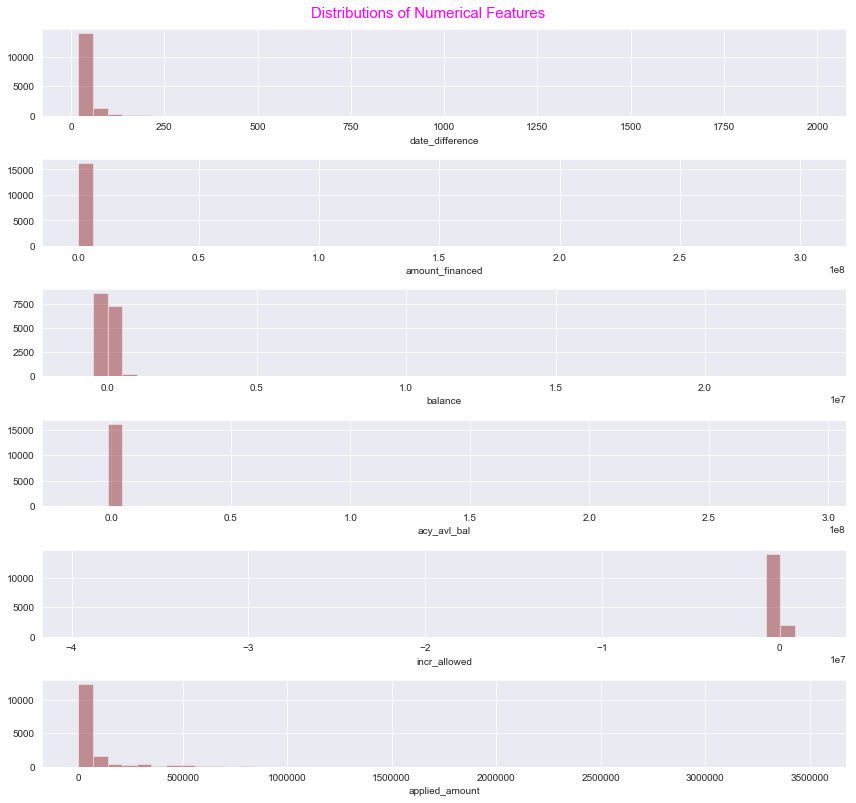

In [52]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=6, ncols = 1, figsize = (12, 11))
fig.suptitle('Distributions of Numerical Features', y= 1.01, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, numerical_columns):
  sns.distplot(df[name], ax = ax, kde = False, color = 'maroon')
plt.tight_layout()

### BAR CHARTS

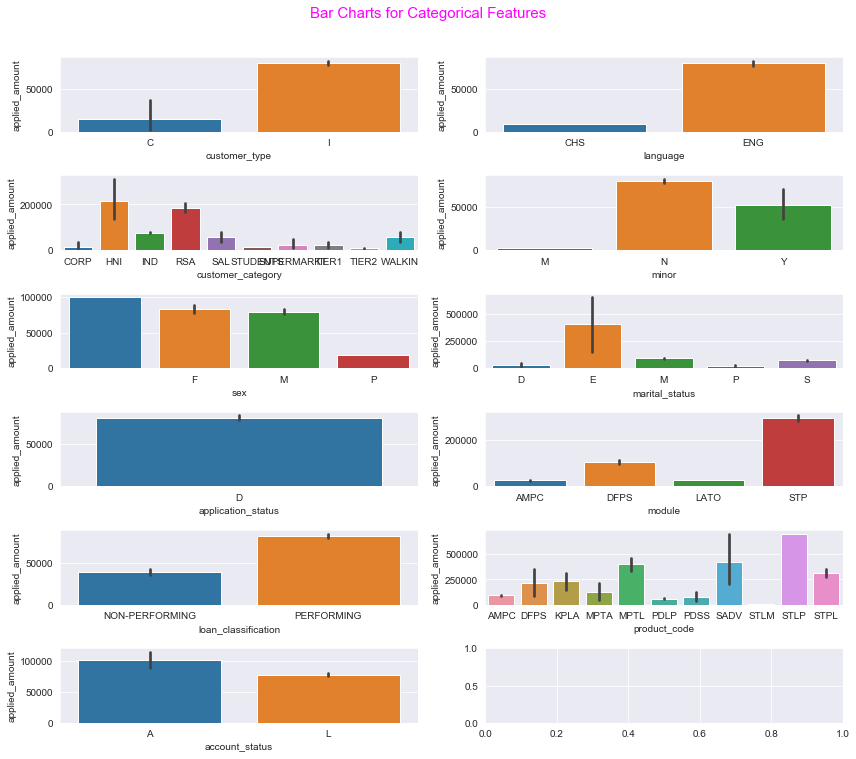

In [53]:
# Bar charts of categorical columns

sns.set_style('darkgrid')                                             # Setting the grid style of plots to dark
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (12, 10))     # Creating four subplots, in two rows and two columns
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Bar Charts for Categorical Features', y = 1.05, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, categorical_columns):   # Iterating through the subplots
  sns.barplot(df[name], df.applied_amount, ax = ax)                   # Creating a barchart in each subplot
  
plt.tight_layout()  # Fitting the subplots to avoid overlapping

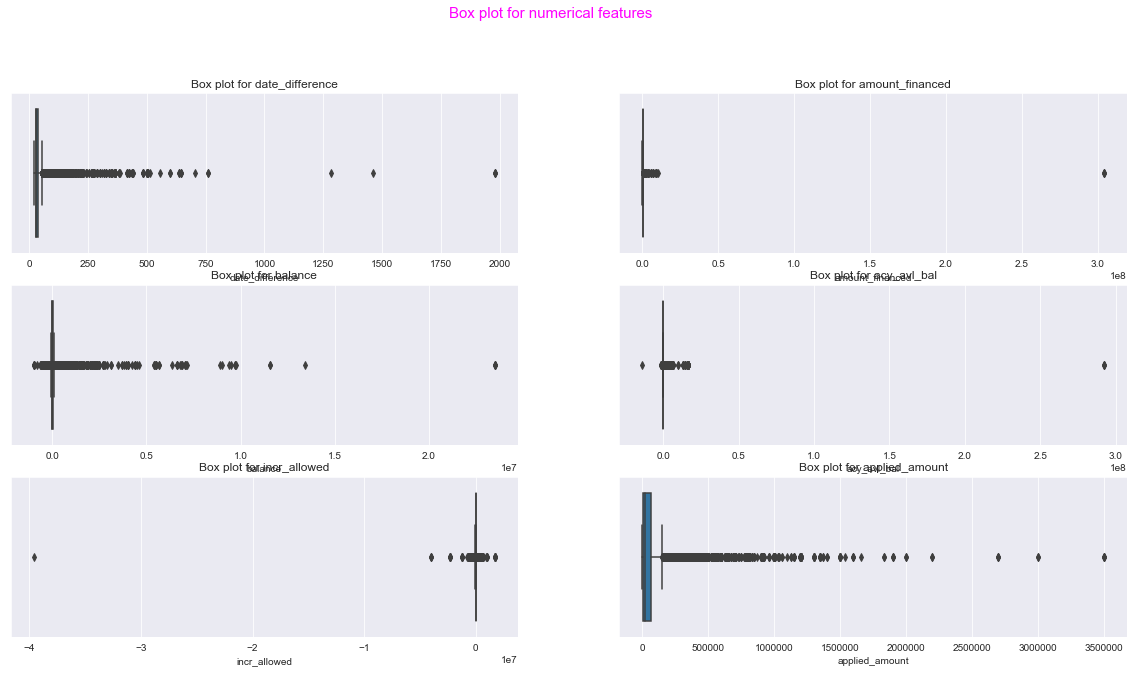

In [54]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 10))
fig.suptitle('Box plot for numerical features', y= 1, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, numerical_columns):
  sns.boxplot(df[name], ax = ax)

  ax.set_title('Box plot for '+ name)

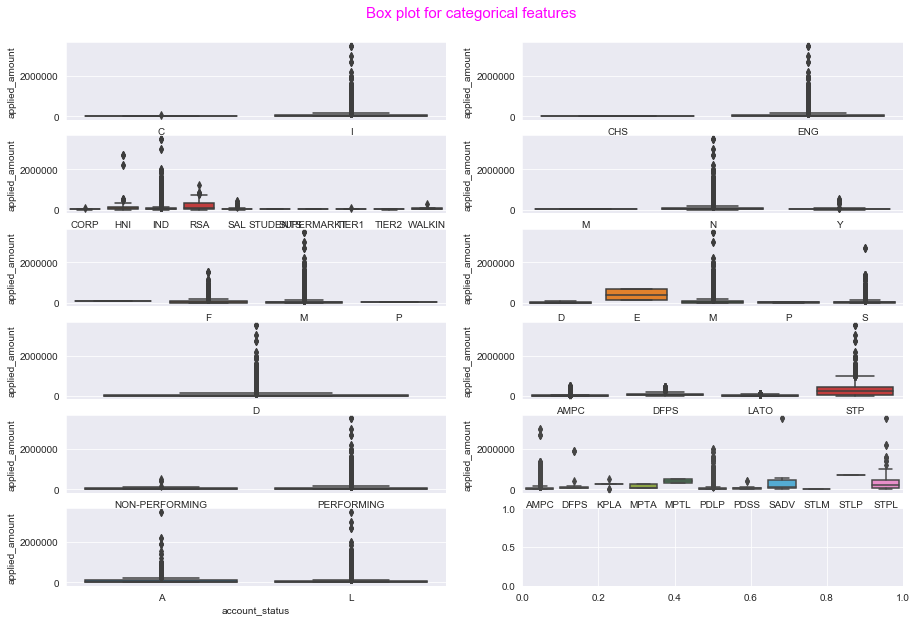

In [55]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for categorical features', y= 0.93, color = 'magenta', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, categorical_columns):
  sns.boxplot(df[name], df.applied_amount, ax = ax)

In [56]:
# Overview of loan (performing vs non-performing)
Loan_Summary = df.groupby('loan_classification')
Loan_Summary.mean()

,incr_allowed,applied_amount,acy_avl_bal,balance,date_difference,amount_financed
loan_classification,,,,,,
NON-PERFORMING,-370.308325,38497.046699,-14069.741783,27505.773768,32.461626,33166.342304
PERFORMING,12388.879439,81937.871041,162099.945123,78580.818141,45.088488,132888.300203


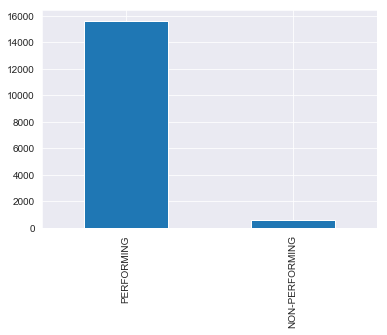

In [57]:
df['loan_classification'].value_counts().plot.bar()

In [58]:
pd.crosstab(df.account_status, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
account_status,,
A,513,800
L,108,14824


Text(0.5, 1.0, 'Account Status Distribution')

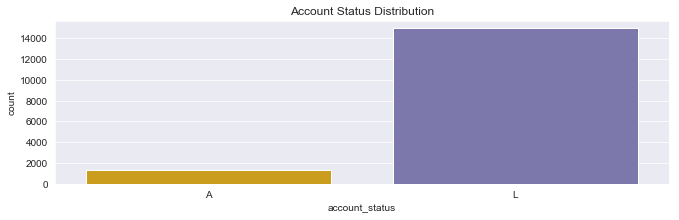

In [59]:
plt.figure(figsize= (11, 3))
sns.countplot(x='account_status', data=df, palette = 'Dark2_r').set_title('Account Status Distribution')

Text(0.5, 1.0, 'Account Status Distribution')

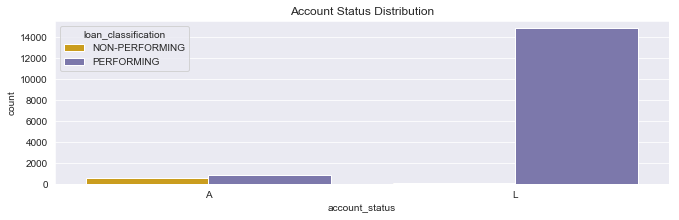

In [60]:
plt.figure(figsize= (11, 3))
sns.countplot(x='account_status', hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Account Status Distribution')



In [61]:
pd.crosstab(df.customer_type, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
customer_type,,
C,1,5
I,620,15619


Text(0.5, 1.0, 'Customer Type Distribution')

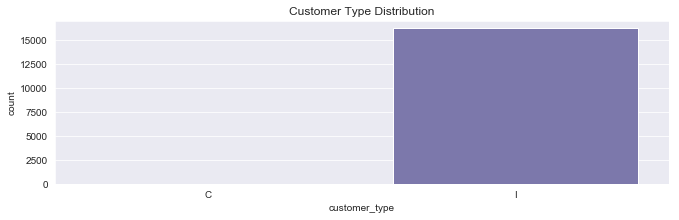

In [62]:
plt.figure(figsize= (11, 3))
sns.countplot(x='customer_type', data=df, palette = 'Dark2_r').set_title('Customer Type Distribution')

In [63]:
pd.crosstab(df.language, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
language,,
CHS,0,3
ENG,621,15621


In [64]:
pd.crosstab(df.customer_category, df.loan_classification)    ###rsa = retired savings account, #sal = 

loan_classification,NON-PERFORMING,PERFORMING
customer_category,,
CORP,1,5
HNI,6,114
IND,613,14912
RSA,0,464
SAL,0,76
STUDENTS,0,2
SUPERMARKT,0,3
TIER1,0,11
TIER2,1,9


Text(0.5, 1.0, 'Customer Category Distribution')

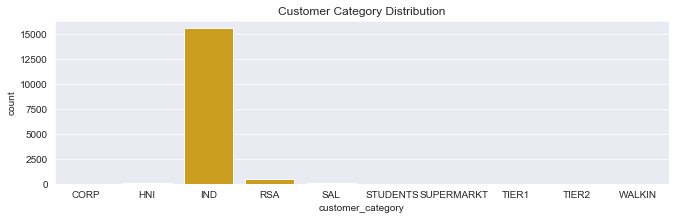

In [65]:
plt.figure(figsize= (11, 3))
sns.countplot(x='customer_category', data=df, palette = 'Dark2_r').set_title('Customer Category Distribution')

Text(0.5, 1.0, 'Customer Category Distribution')

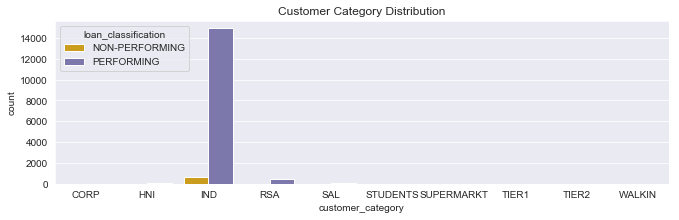

In [66]:
plt.figure(figsize= (11, 3))
sns.countplot(x='customer_category', hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Customer Category Distribution')

In [67]:
pd.crosstab(df.minor, df.loan_classification)    

loan_classification,NON-PERFORMING,PERFORMING
minor,,
M,0,2
N,610,15516
Y,11,106


In [68]:
pd.crosstab(df.marital_status, df.loan_classification)   

loan_classification,NON-PERFORMING,PERFORMING
marital_status,,
D,0,12
E,0,4
M,207,6631
P,0,10
S,414,8967


Text(0.5, 1.0, 'Marital Status Distribution')

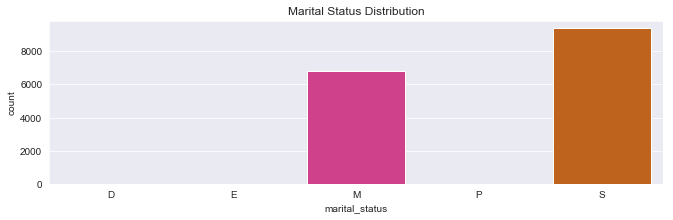

In [69]:
plt.figure(figsize= (11, 3))
sns.countplot(x='marital_status', data=df, palette = 'Dark2_r').set_title('Marital Status Distribution')

Text(0.5, 1.0, 'Marital Status Distribution')

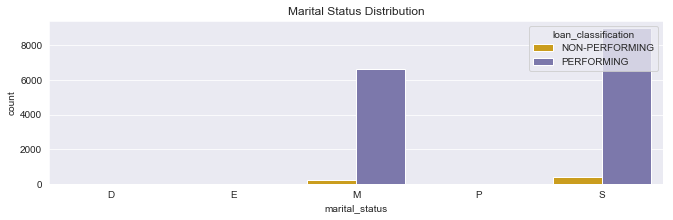

In [70]:
plt.figure(figsize= (11, 3))
sns.countplot(x='marital_status' , hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Marital Status Distribution')


In [71]:
pd.crosstab(df.sex, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
sex,,
,4,0
F,54,3061
M,561,12563
P,2,0


Text(0.5, 1.0, 'Gender Distribution')

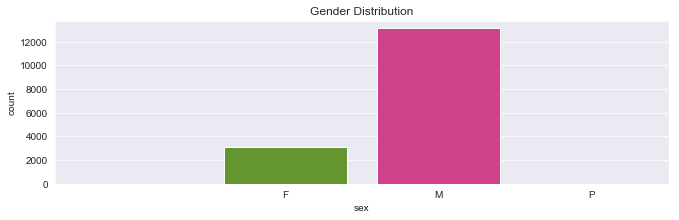

In [72]:
plt.figure(figsize= (11, 3))
sns.countplot(x='sex' , data=df, palette = 'Dark2_r').set_title('Gender Distribution')


Text(0.5, 1.0, 'Gender Distribution')

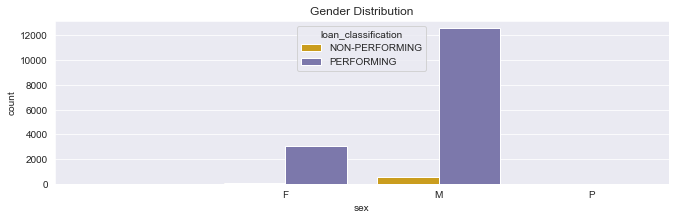

In [73]:
plt.figure(figsize= (11, 3))
sns.countplot(x='sex' , hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Gender Distribution')


In [74]:
pd.crosstab(df.application_status, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
application_status,,
D,621,15624


Text(0.5, 1.0, 'Application Status Distribution')

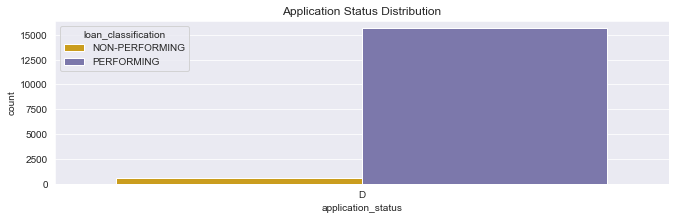

In [75]:
plt.figure(figsize= (11, 3))
sns.countplot(x='application_status' , hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Application Status Distribution')



In [76]:
pd.crosstab(df.module, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
module,,
AMPC,0,6157
DFPS,0,523
LATO,616,5898
STP,5,3046


Text(0.5, 1.0, 'Module Distribution')

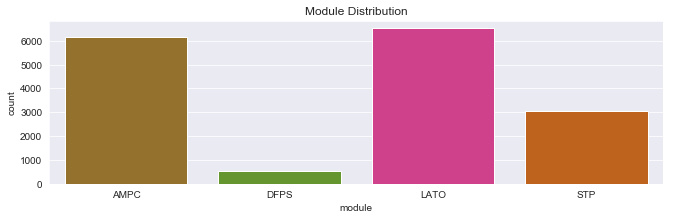

In [77]:
plt.figure(figsize= (11, 3))
sns.countplot(x='module' , data=df, palette = 'Dark2_r').set_title('Module Distribution')



Text(0.5, 1.0, 'Module Distribution')

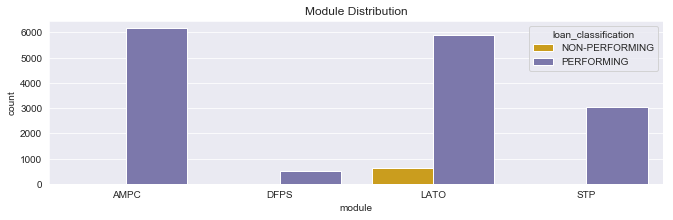

In [78]:
plt.figure(figsize= (11, 3))
sns.countplot(x='module' , hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Module Distribution')



In [79]:
pd.crosstab(df.product_code, df.loan_classification)

loan_classification,NON-PERFORMING,PERFORMING
product_code,,
AMPC,52,6540
DFPS,0,43
KPLA,1,8
MPTA,0,5
MPTL,0,6
PDLP,562,8607
PDSS,1,22
SADV,0,34
STLM,0,3


Text(0.5, 1.0, 'Product Distribution')

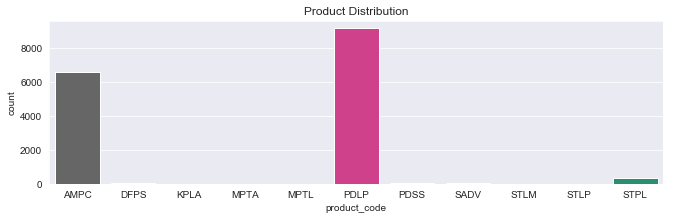

In [80]:
plt.figure(figsize= (11, 3))
sns.countplot(x='product_code' , data=df, palette = 'Dark2_r').set_title('Product Distribution')



Text(0.5, 1.0, 'Product Distribution')

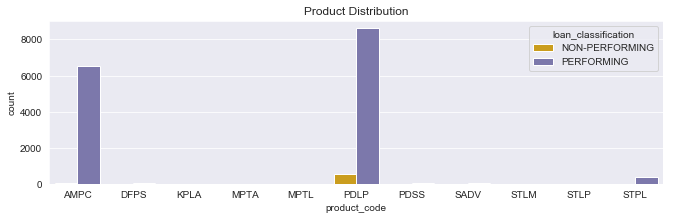

In [81]:
plt.figure(figsize= (11, 3))
sns.countplot(x= 'product_code' , hue = 'loan_classification', data=df, palette = 'Dark2_r').set_title('Product Distribution')



### GENERAL FREQUENCY TABLE

In [82]:
# Creating Frequency table of each categorical column

for column in categorical_columns:     # Iterating through each column in the categorical columns list
  print('\n')                          # Creating a new line for better readability
  print(df[column].value_counts())     # Printing a frequency table of each categorical column



I    16239
C        6
Name: customer_type, dtype: int64


ENG    16242
CHS        3
Name: language, dtype: int64


IND           15525
RSA             464
HNI             120
SAL              76
WALKIN           28
TIER1            11
TIER2            10
CORP              6
SUPERMARKT        3
STUDENTS          2
Name: customer_category, dtype: int64


N    16126
Y      117
M        2
Name: minor, dtype: int64


M    13124
F     3115
         4
P        2
Name: sex, dtype: int64


S    9381
M    6838
D      12
P      10
E       4
Name: marital_status, dtype: int64


D    16245
Name: application_status, dtype: int64


LATO    6514
AMPC    6157
STP     3051
DFPS     523
Name: module, dtype: int64


PERFORMING        15624
NON-PERFORMING      621
Name: loan_classification, dtype: int64


PDLP    9169
AMPC    6592
STPL     359
DFPS      43
SADV      34
PDSS      23
KPLA       9
MPTL       6
MPTA       5
STLM       3
STLP       2
Name: product_code, dtype: int64


L    14932
A     1313
Na

### CORRELATION HEAT MAP

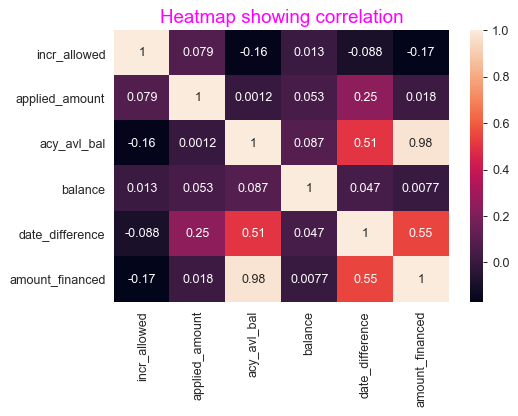

In [83]:
cor = df.corr()

plt.figure(dpi=90)
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.title('Heatmap showing correlation', y = 1.05, color = 'magenta', fontsize = 15)
plt.show()

### **Correlation of variables**

In [84]:
# Finding the correlation between the variables in the dataset.
# When the value is near zero, there is no linear relationship. 
# As the correlation gets closer to plus or minus one, the relationship is stronger. 
# A value of one (or negative one) indicates a perfect linear relationship between two variables.

df.corr()

,incr_allowed,applied_amount,acy_avl_bal,balance,date_difference,amount_financed
incr_allowed,1.000000,0.078587,-0.162556,0.012723,-0.087579,-0.169501
applied_amount,0.078587,1.000000,0.001207,0.052867,0.246769,0.018044
acy_avl_bal,-0.162556,0.001207,1.000000,0.087023,0.505845,0.975934
balance,0.012723,0.052867,0.087023,1.000000,0.047387,0.007696
date_difference,-0.087579,0.246769,0.505845,0.047387,1.000000,0.546664
amount_financed,-0.169501,0.018044,0.975934,0.007696,0.546664,1.000000


### FEATURE ENGINEERING

#### Logistic Regression

I chose to use a a logistic regression model because it is widely used for classification problems. Logistic regression doesn’t require linear relationship between dependent and independent variables. It can handle various types of relationships because it applies a non-linear log transformation to the predicted odds ratio

#### Random Forest Algorithm

I chose to use a Random Forest algorithm because it is impressive in versatility. It can handle binary features, categorical features, and numerical features. Random forests is great with high dimensional data since we are working with subsets of data. Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features. 

#### Decision Tree Algorithm

Decision trees are built using a heuristic called recursive partitioning. This approach is also commonly known as divide and conquer because it splits the data into subsets, which are then split repeatedly into even smaller subsets, and so on and so forth until the process stops when the algorithm determines the data within the subsets are sufficiently homogenous, or another stopping criterion has been met.

In [85]:
# Splitting up the data into an X array that contains the features to train on, and a y array with the target variable

X = df.drop(['loan_classification'], axis = 1)

In [86]:
X.shape

(16245, 16)

In [87]:
y = df['loan_classification']

In [88]:
y.shape

(16245,)

In [89]:
# Encoding the categorical columns using the get_dummies function

X = pd.get_dummies(X)

In [90]:
# Encoding the target variable as classification works with numbers only

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [91]:
# Splitting the dataset into the Training set and Test set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [92]:
###training the  data and predicting using logistic regression

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
# Making predictions using the trained model

y_pred = model_log.predict(X_test)

In [94]:
##Measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9622486663931062 and the f1 score is 0.9807611877875366


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.96      1.00      0.98      4690

   micro avg       0.96      0.96      0.96      4874
   macro avg       0.48      0.50      0.49      4874
weighted avg       0.93      0.96      0.94      4874



array([[   0,  184],
       [   0, 4690]], dtype=int64)

### FURTHER FEATURE ENGINEERING

In [95]:
from sklearn.utils import resample

In [96]:
# Separate majority and minority classes
df_majority = df[df.loan_classification == 'PERFORMING']
df_minority = df[df.loan_classification == 'NON-PERFORMING']

In [97]:
###upsampling the minority class which is the number of non performing loans by 30%

df_minority_upsampled = resample(df_minority, 
                                 replace = True,    
                                 n_samples = 5260, 
                                 random_state = 101) 
 

In [98]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [99]:
df_upsampled.loan_classification.value_counts()

PERFORMING        15624
NON-PERFORMING     5260
Name: loan_classification, dtype: int64

In [100]:
dff = df_upsampled

In [101]:
# Splitting up the data into an X array that contains the features to train on, and a y array with the target variable

X = dff.drop(['loan_classification'], axis = 1)

In [102]:
X.shape

(20884, 16)

In [103]:
y = dff['loan_classification']

In [104]:
y.shape

(20884,)

In [105]:
# Encoding the categorical columns using the get_dummies function

X = pd.get_dummies(X)

In [106]:
# Encoding the target variable as linear regression works with numbers only

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [107]:
# Splitting the dataset into the Training set and Test set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [108]:
# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
###training the  data and predicting using logistic regression

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
# Making predictions using the trained model

y_pred = model_log.predict(X_test)

In [111]:
##Measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9433450367060325 and the f1 score is 0.962406015037594


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1577
           1       0.96      0.97      0.96      4689

   micro avg       0.94      0.94      0.94      6266
   macro avg       0.93      0.92      0.92      6266
weighted avg       0.94      0.94      0.94      6266



array([[1367,  210],
       [ 145, 4544]], dtype=int64)

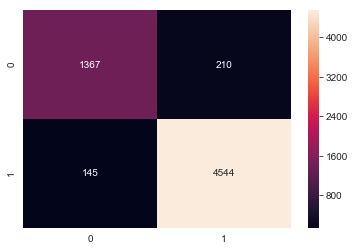

In [112]:
confusion_matrix1 = confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix1, annot = True, annot_kws={"size": 10},fmt="d")

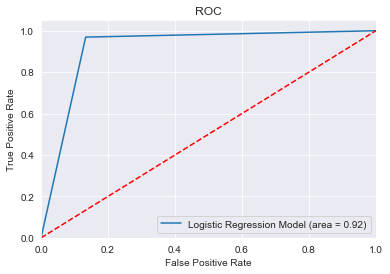

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression Model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### RANDOM FOREST MODEL

In [114]:
# Splitting up the data into an X array that contains the features to train on, and a y array with the target variable

X = dff.drop(['loan_classification'], axis = 1)

In [115]:
X.shape

(20884, 16)

In [116]:
y = dff['loan_classification']

In [117]:
y.shape

(20884,)

In [118]:
# Encoding the categorical columns using the get_dummies function

X = pd.get_dummies(X)

In [119]:
# Encoding the target variable 

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [120]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [121]:
# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
# Instantiating the model

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
# Making predictions

y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9928183849345675 and the f1 score is 0.9951783992285439


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1577
           1       1.00      0.99      1.00      4689

   micro avg       0.99      0.99      0.99      6266
   macro avg       0.99      1.00      0.99      6266
weighted avg       0.99      0.99      0.99      6266



array([[1577,    0],
       [  45, 4644]], dtype=int64)

In [124]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances

impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
account_status_A,0.2405
account_status_L,0.1890
acy_avl_bal,0.1063
module_LATO,0.1034
amount_financed,0.0643
incr_allowed,0.0614
applied_amount,0.0587
balance,0.0536
module_AMPC,0.0259


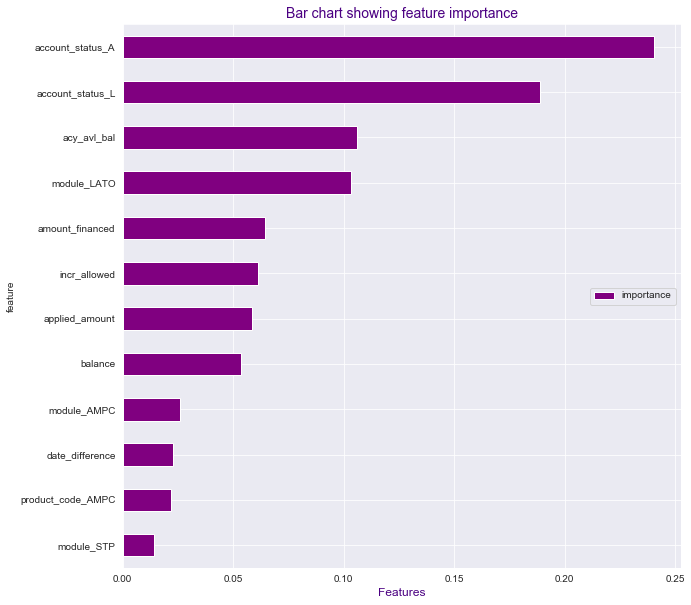

In [125]:
# Creating a bar chart of feature importance in descending order

impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

*From the above feature importance barchart, it can be observed that:*


*   The most important feature in predicting whether a loan is performing or not performing
*   The following features are important in predicting the target;
                      * account_status_a   * amount_financed   * module_AMPC               
                      * account_status_l   * incr_allowed      * date_difference     
                      * module_LATO        * applied_amount    * product_code_AMPC  
                      * acy_avl_bal        * balance           * module_STP            


### Remodelling with the most important features only

I will be dropping 'acy_avl_bal and amount_financed' because they have a very high correlation > 0.96 and I wouldn't want my model generalizing

In [126]:
# Selecting only important features and the y variable

X = X[['account_status_A', 'account_status_L', 'module_LATO', 'incr_allowed', 'applied_amount',
        'balance', 'module_AMPC', 'date_difference', 'product_code_AMPC', 'module_STP']]

In [127]:
X.shape

(20884, 10)

In [128]:
y.shape

(20884,)

In [129]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [130]:
# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [131]:
# Instantiating the model

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
# Making predictions

y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.980529843600383 and the f1 score is 0.9868307426597582


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1577
           1       1.00      0.97      0.99      4689

   micro avg       0.98      0.98      0.98      6266
   macro avg       0.96      0.99      0.97      6266
weighted avg       0.98      0.98      0.98      6266



array([[1573,    4],
       [ 118, 4571]], dtype=int64)

There is a marginal decrease in f1 score, from 99% to 98%

### Parameter Tuning

In [133]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
# Creating a dictionary of parameters to tune

params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [135]:
# Selecting only important features and the y variable

X = X[['account_status_A', 'account_status_L', 'module_LATO', 'incr_allowed', 'applied_amount',
        'balance', 'module_AMPC', 'date_difference', 'product_code_AMPC', 'module_STP']]

In [136]:
y.shape

(20884,)

In [137]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [138]:
# Instantiating the model

rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [139]:
# Making predictions

y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9407915735716565 and the f1 score is 0.961000735835173


              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1577
           1       0.95      0.97      0.96      4689

   micro avg       0.94      0.94      0.94      6266
   macro avg       0.93      0.91      0.92      6266
weighted avg       0.94      0.94      0.94      6266



array([[1324,  253],
       [ 118, 4571]], dtype=int64)

### *Parameter tuning has generally decreased the f1 score by a small margin, but the stability of the model has improved*

#### Cross Validation to check for the stability of the mode

In [140]:
# Performing cross validation of ten folds

scores = cross_val_score(rf, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9598576931550102
Standard deviation of the cross validation scores is 0.006002229099917142





*The true f1 score of the model is approximately 95.9%, with a variance of 0.0058.*


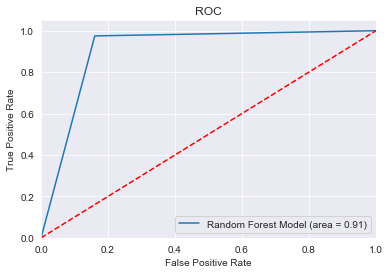

In [141]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### DECISION TREE MODEL

In [142]:
# Splitting up the data into an X array that contains the features to train on, and a y array with the target variable

X = dff.drop(['loan_classification'], axis = 1)

In [143]:
X.shape

(20884, 16)

In [144]:
y = dff['loan_classification']

In [145]:
y.shape

(20884,)

In [146]:
# Encoding the categorical columns using the get_dummies function

X = pd.get_dummies(X)

In [147]:
# Encoding the target variable 

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [148]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [149]:
# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [150]:
# Instantiating the model

dc = DecisionTreeClassifier(random_state = 0)
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [151]:
# Making predictions

y_pred = dc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9905841046919885 and the f1 score is 0.9936688485889044


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1577
           1       1.00      0.99      0.99      4689

   micro avg       0.99      0.99      0.99      6266
   macro avg       0.98      0.99      0.99      6266
weighted avg       0.99      0.99      0.99      6266



array([[1577,    0],
       [  59, 4630]], dtype=int64)

In [152]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances

impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(dc.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
account_status_A,0.6180
amount_financed,0.0896
module_LATO,0.0850
acy_avl_bal,0.0709
balance,0.0401
applied_amount,0.0379
product_code_PDLP,0.0231
date_difference,0.0120
marital_status_M,0.0081


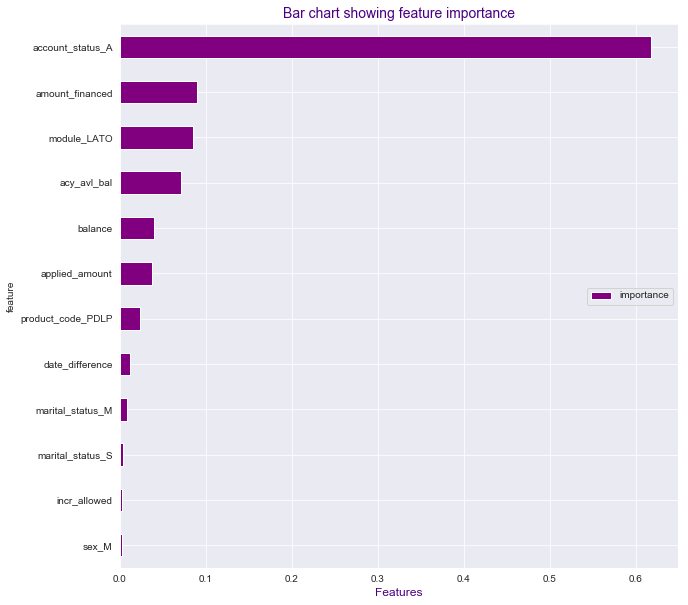

In [153]:
# Creating a bar chart of feature importance in descending order

impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

*From the above feature importance barchart, it can be observed that:*


*   The most important feature in predicting whether a loan is performing or not performing
*   The following features are important in predicting the target;
                      * account_status_a   * balance             * marital_status_M               
                      * amount_financed    * applied_amount      * marital_status_S     
                      * module_LATO        * product_code_PDLP   * incr_allowed  
                      * acy_avl_bal        * date_difference     * sex_M          


### Remodelling with the most important features only

I will be dropping 'acy_avl_bal and amount_financed' because they have a very high correlation > 0.96 and I wouldn't want my model generalizing

In [154]:
# Selecting only important features and the y variable

X = X[['account_status_A', 'module_LATO', 'balance', 'applied_amount', 'product_code_PDLP',
       'date_difference', 'marital_status_M', 'marital_status_S', 'incr_allowed', 'sex_M']]

In [155]:
X.shape

(20884, 10)

In [156]:
y.shape

(20884,)

In [157]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [158]:
# Standardising the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [159]:
# Instantiating the model

dc = DecisionTreeClassifier(random_state = 0)
dc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [160]:
# Making predictions

y_pred = dc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9864347270986276 and the f1 score is 0.99085333046379


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1577
           1       1.00      0.98      0.99      4689

   micro avg       0.99      0.99      0.99      6266
   macro avg       0.97      0.99      0.98      6266
weighted avg       0.99      0.99      0.99      6266



array([[1577,    0],
       [  85, 4604]], dtype=int64)

There is no marginal decrease or increase in f1 score

### HYPERPARAMETER TUNING

In [161]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [162]:
# Creating a dictionary of parameters to tune

params = {'max_leaf_nodes': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'max_leaf_nodes': 30}


In [163]:
# Selecting only important features and the y variable

X = X[['account_status_A', 'module_LATO', 'balance', 'applied_amount', 'product_code_PDLP',
       'date_difference', 'marital_status_M', 'marital_status_S', 'incr_allowed', 'sex_M']]

In [164]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [165]:
# Instantiating the model

dc = DecisionTreeClassifier(max_depth=5, max_leaf_nodes = 100, random_state = 0)
dc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [166]:
# Making predictions

y_pred = dc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9433450367060325 and the f1 score is 0.9620036390880873


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1577
           1       0.97      0.96      0.96      4689

   micro avg       0.94      0.94      0.94      6266
   macro avg       0.92      0.93      0.93      6266
weighted avg       0.94      0.94      0.94      6266



array([[1417,  160],
       [ 195, 4494]], dtype=int64)

### *Parameter tuning has generally decreased the f1 score by a small margin to 96.2%, but the stability of the model has improved*

#### Cross Validation to check for the stability of the model

In [167]:
# Performing cross validation of ten folds

scores = cross_val_score(dc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9624931500808696
Standard deviation of the cross validation scores is 0.007692095026575113





*The true f1 score of the model is approximately 96.2%, with a variance of 0.00769.*


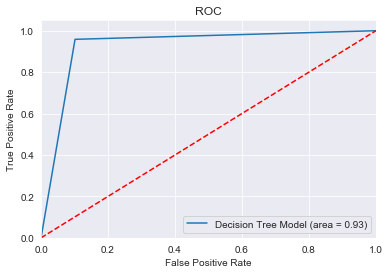

In [168]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('ROC')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### CONCLUSION

* Out of all the models used to predict whether a loan is performing or not, the RandomForestClassifier and DecisionTree Classifier both perform well with an f1 score of approximately 96%, they have very similar accuruacy score of 94.07% and 94.33% respectively.



* This model should be handled with care, as it might lead to overfitting when predicting new data. This is because one of the disadvantages of ensemble algorithms is that they are prone to over fitting so when working with new data, close attention should be paid to hyperparameter tuning to ensure the model performs better


